In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt2
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor  
import graphviz
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from ggplot import *
import pydotplus

from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import metrics  
from sklearn.model_selection import train_test_split  


/Users/Felicia/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Import df

mp  = pd.read_csv('/Users/Felicia/Documents/Felicia Zhang/Felicia/Princeton/ConsultingClub/Mindprint/Mindprint_ScaledScores_YesCombo_111518.csv')
mp.set_index('customer_id', inplace=True)

print('Data size:',len(mp), 'rows') 

Data size: 236 rows


In [3]:
mp.head()

,age,SM_Sz,SM_SCORE,VMEM_Az,VMEM_Sz,VMEM_efficiency,VMEM_SCORE,ABF_Az,ABF_Sz,ABF_efficiency,...,DEPRESSION,ACTversion,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore
customer_id,,,,,,,,,,,,,,,,,,,,,
512,15,1.0190,medium_strength,0.6298,0.3895,0.50965,high_expected,-0.0704,-0.1611,-0.11575,...,0,70G,67,44.0,36.0,26.0,29,26.0,31.0,24.0
512,15,1.0190,medium_strength,0.6298,0.3895,0.50965,high_expected,-0.0704,-0.1611,-0.11575,...,0,Combo,56,33.0,54.0,46.0,18,16.0,21.0,19.0
513,16,0.7039,high_expected,0.9644,1.1184,1.04140,high_expected,1.0407,1.0965,1.06860,...,0,71E,59,36.0,29.0,15.0,26,23.0,25.0,18.0
517,17,1.7537,high_strength,0.6250,1.0837,0.85435,high_expected,0.9616,0.2867,0.62415,...,0,71A,70,44.0,35.0,27.0,32,27.0,31.0,24.0
677,16,0.6158,high_expected,-0.0539,0.6653,0.30570,medium_expected,-1.9930,0.8253,-0.58385,...,0,71C,51,23.0,30.0,18.0,22,17.0,27.0,19.0


In [4]:
# Label students who received extra time: 2507 (don't have data), 2421, 4499, 6150, 517, 2010, 2948, 6171, 5866, 4967, 2720, 1872, 6808
mp['ExtraTime'] = 0

mp.loc[2421, 'ExtraTime'] = 1
mp.loc[4499, 'ExtraTime'] = 1
mp.loc[6150, 'ExtraTime'] = 1
mp.loc[517, 'ExtraTime'] = 1
mp.loc[2010, 'ExtraTime'] = 1
mp.loc[2948, 'ExtraTime'] = 1
mp.loc[6171, 'ExtraTime'] = 1
mp.loc[5866, 'ExtraTime'] = 1
mp.loc[4967, 'ExtraTime'] = 1
mp.loc[2720, 'ExtraTime'] = 1
mp.loc[1872, 'ExtraTime'] = 1
mp.loc[6808, 'ExtraTime'] = 1

print('Number of students who received extra time:',len(mp.loc[mp['ExtraTime'] == 1]))

Number of students who received extra time: 14


In [5]:
# Replace outlier Mindprint scores (accuracy scores with < -2 with NAN)
# 1901: WM_Az, 5143: ATT_Az, 1902: ATT_Az, 6381: ATT_Az

print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

-6.8829 -4.2585 -4.2585 customer_id
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
6381   -5.6713
Name: ATT_Az, dtype: float64


In [6]:
mp.loc[1901, 'WM_Az'] = np.nan
mp.loc[5143, 'ATT_Az'] = np.nan
mp.loc[1902, 'ATT_Az'] = np.nan
mp.loc[6381, 'ATT_Az'] = np.nan

In [7]:
print(mp.loc[1901, 'WM_Az'], mp.loc[5143, 'ATT_Az'], mp.loc[1902, 'ATT_Az'], mp.loc[6381, 'ATT_Az'])

nan nan nan customer_id
6381   NaN
6381   NaN
6381   NaN
6381   NaN
6381   NaN
6381   NaN
6381   NaN
Name: ATT_Az, dtype: float64


In [8]:
# Remove students that having missing subject scores

print('Number of students removed with missing subject scores:',len(mp) - len(mp.dropna(subset=['EngScaledScore','MathScaledScore','ReadingScaledScore','ScienceScaledScore']))) 

Number of students removed with missing subject scores: 5


In [9]:
mp = mp.dropna(subset=['EngScaledScore','MathScaledScore','ReadingScaledScore','ScienceScaledScore']) 
len(mp)

231

In [10]:
print('Number of students removed after removing NA mindprint scores:',len(mp) - len(mp.dropna()))

Number of students removed after removing NA mindprint scores: 9


In [11]:
mp = mp.dropna()
len(mp)

222

In [12]:
# Calculate descriptive statistics

mp.describe().round(1)

,age,SM_Sz,VMEM_Az,VMEM_Sz,VMEM_efficiency,ABF_Az,ABF_Sz,ABF_efficiency,LAN_Az,LAN_Sz,...,DEPRESSION,EngRaw,MathRaw,ReadingRaw,ScienceRaw,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,ExtraTime
count,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,...,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0
mean,16.2,0.8,0.3,0.3,0.3,0.1,0.4,0.3,0.5,0.1,...,0.1,56.4,40.0,31.8,30.1,23.4,23.3,23.2,22.5,0.1
std,0.8,0.6,0.7,0.6,0.5,1.1,0.9,0.8,0.5,0.8,...,0.4,13.2,11.5,15.9,15.5,5.2,4.5,5.1,3.8,0.2
min,14.0,-1.7,-3.1,-1.6,-1.6,-3.9,-3.7,-3.2,-1.4,-3.4,...,0.0,24.0,14.0,8.0,6.0,10.0,15.0,9.0,10.0,0.0
25%,16.0,0.4,-0.1,-0.1,-0.0,-0.2,0.0,0.0,0.2,-0.3,...,0.0,49.0,33.0,22.0,21.0,20.0,19.2,20.0,20.0,0.0
50%,16.0,0.9,0.6,0.4,0.4,0.4,0.6,0.4,0.6,0.2,...,0.0,56.0,39.0,27.0,26.0,23.0,24.0,23.0,23.0,0.0
75%,17.0,1.2,0.6,0.8,0.7,1.0,0.9,0.8,1.0,0.7,...,0.0,65.0,46.0,35.0,32.0,27.0,26.8,27.0,24.0,0.0
max,21.0,2.0,1.0,1.5,1.2,2.5,3.4,1.8,1.1,1.4,...,2.0,95.0,87.0,96.0,100.0,35.0,35.0,34.0,36.0,1.0


In [13]:
# Only want the scaled subject scores

scores = mp.iloc[:,[-5,-4,-3,-2,-1]]
scores['TotalScore'] = scores.mean(axis=1).astype(int)
scores.head()

/Users/Felicia/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,EngScaledScore,MathScaledScore,ReadingScaledScore,ScienceScaledScore,ExtraTime,TotalScore
customer_id,,,,,,
512,29,26.0,31.0,24.0,0,22
512,18,16.0,21.0,19.0,0,14
513,26,23.0,25.0,18.0,0,18
517,32,27.0,31.0,24.0,1,23
677,22,17.0,27.0,19.0,0,17


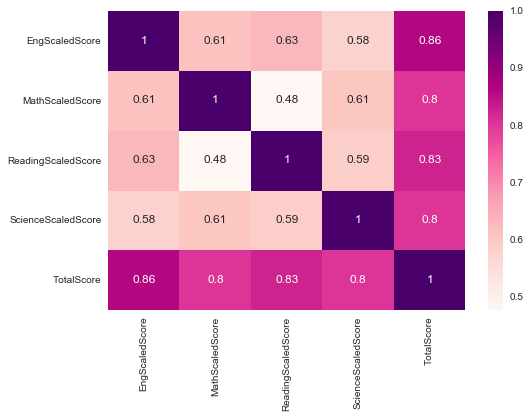

In [14]:
# Heatmap
# remove extratime column for the heatmap
scores2 = scores.drop('ExtraTime', 1)

fig = sns.heatmap(scores2.corr(),annot=True, cmap='RdPu')
plt2.show()

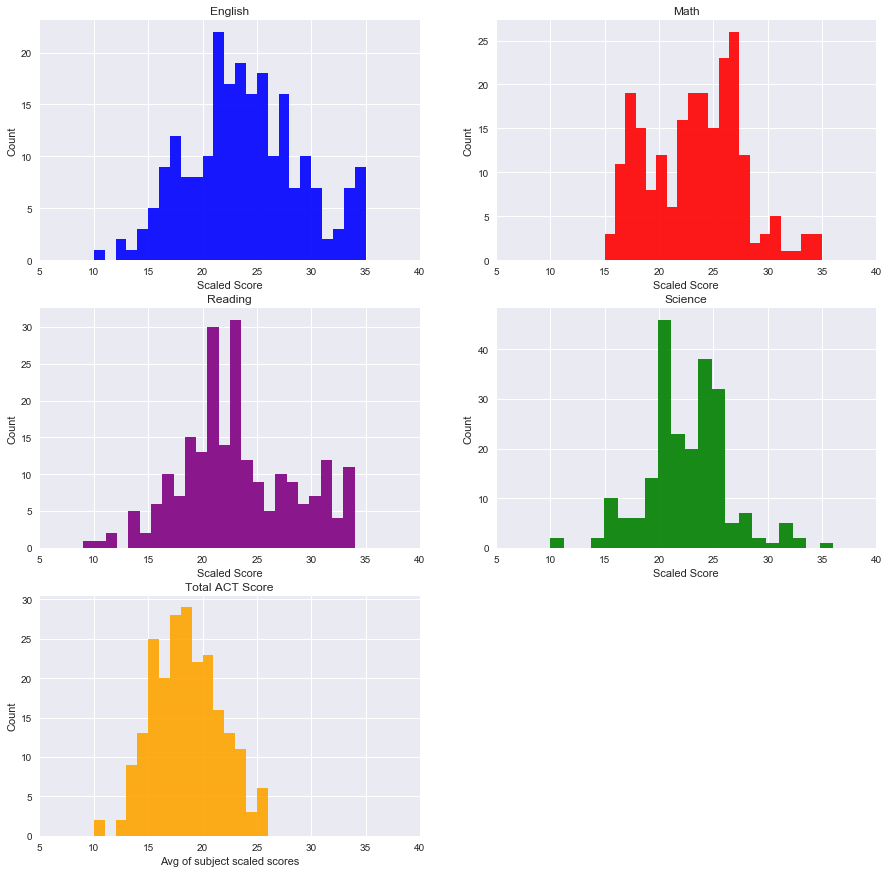

In [15]:
# Plot distribution of subject scores
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(321)
ax2 = fig1.add_subplot(322)
ax3 = fig1.add_subplot(323)
ax4 = fig1.add_subplot(324)
ax5 = fig1.add_subplot(325)

x = scores.loc[:,'EngScaledScore']
n, bins, patches = ax1.hist(x, len(scores.EngScaledScore.unique()), facecolor='blue', alpha=0.9)
ax1.set_title("English")
ax1.set_ylabel("Count")
ax1.set_xlabel("Scaled Score")
ax1.set_xlim(5,40,5)

x = scores.loc[:,'MathScaledScore']
n, bins, patches = ax2.hist(x, len(scores.MathScaledScore.unique()), facecolor='red', alpha=0.9)
ax2.set_title("Math")
ax2.set_ylabel("Count")
ax2.set_xlabel("Scaled Score")
ax2.set_xlim(5,40,5)

x = scores.loc[:,'ReadingScaledScore']
n, bins, patches = ax3.hist(x, len(scores.ReadingScaledScore.unique()), facecolor='purple', alpha=0.9)
ax3.set_title("Reading")
ax3.set_ylabel("Count")
ax3.set_xlabel("Scaled Score")
ax3.set_xlim(5,40,5)

x = scores.loc[:,'ScienceScaledScore']
n, bins, patches = ax4.hist(x, len(scores.ScienceScaledScore.unique()), facecolor='green', alpha=0.9)
ax4.set_title("Science")
ax4.set_ylabel("Count")
ax4.set_xlabel("Scaled Score")
ax4.set_xlim(5,40,5)

x = scores.loc[:,'TotalScore']
n, bins, patches = ax5.hist(x, len(scores.TotalScore.unique()), facecolor='orange', alpha=0.9)
ax5.set_title("Total ACT Score")
ax5.set_ylabel("Count")
ax5.set_xlabel("Avg of subject scaled scores")
ax5.set_xlim(5,40,5)

plt.show()

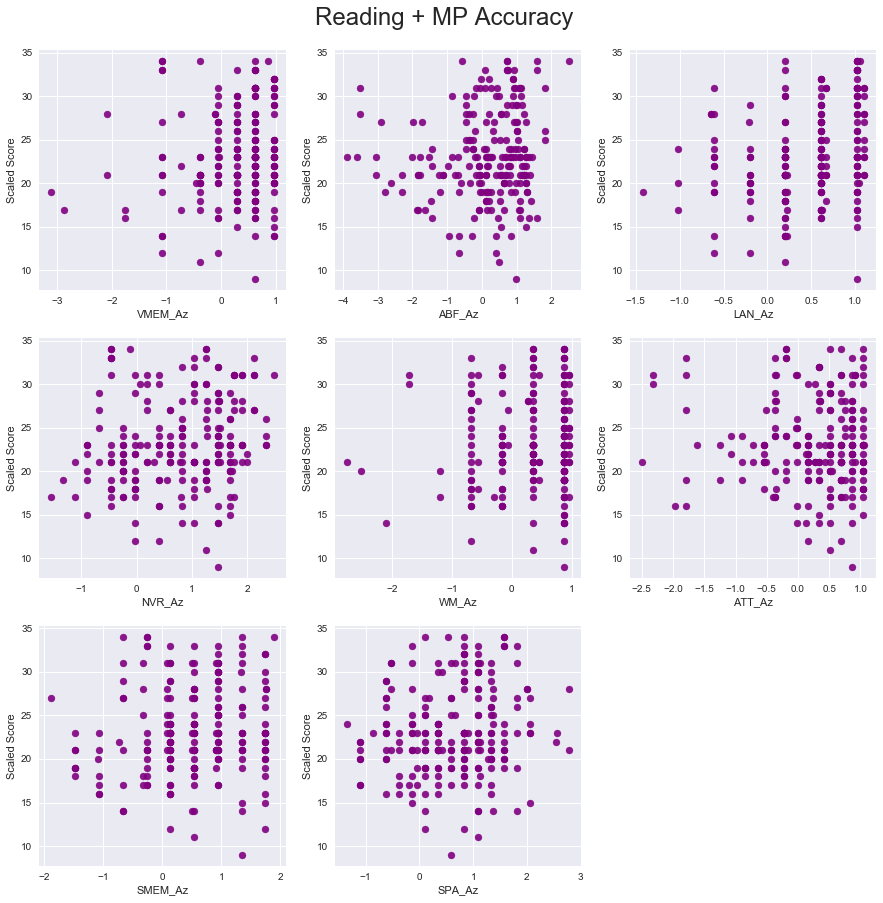

In [16]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# READING + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Reading + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'ReadingScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='purple', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='purple', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='purple', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='purple', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='purple', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='purple', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='purple', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='purple', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")

plt.show()

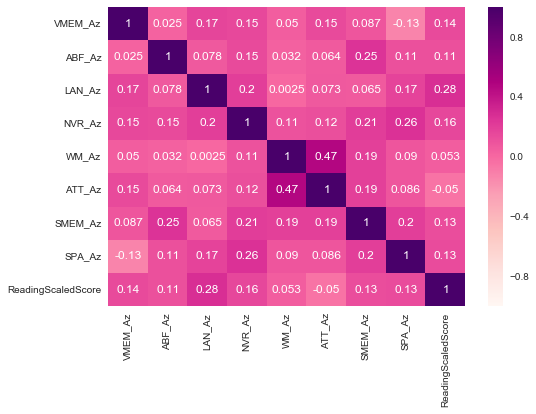

In [17]:
foo2 = mp.loc[:, mp.columns.str.contains('_Az|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

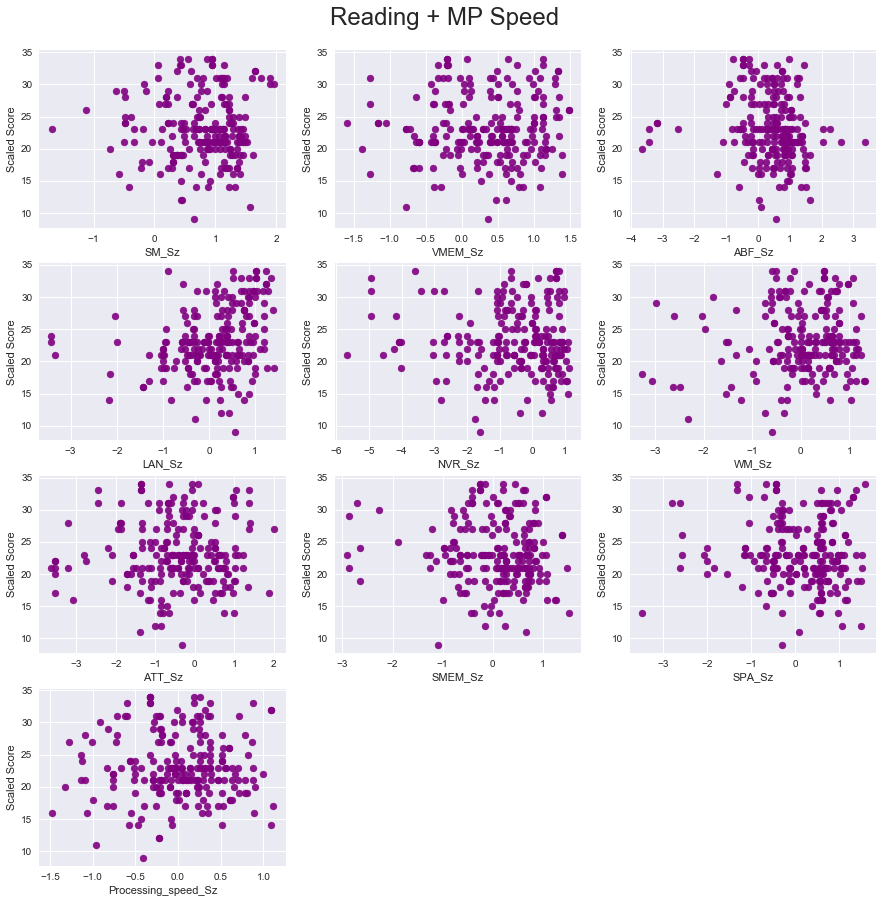

In [18]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# READING + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('Reading + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'ReadingScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='purple', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='purple', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='purple', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='purple', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='purple', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='purple', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='purple', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='purple', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='purple', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='purple', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

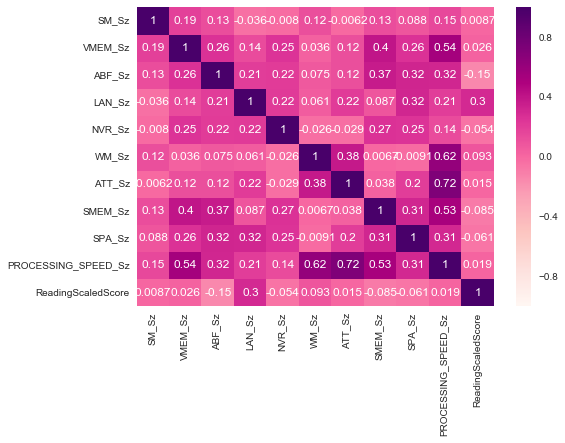

In [19]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

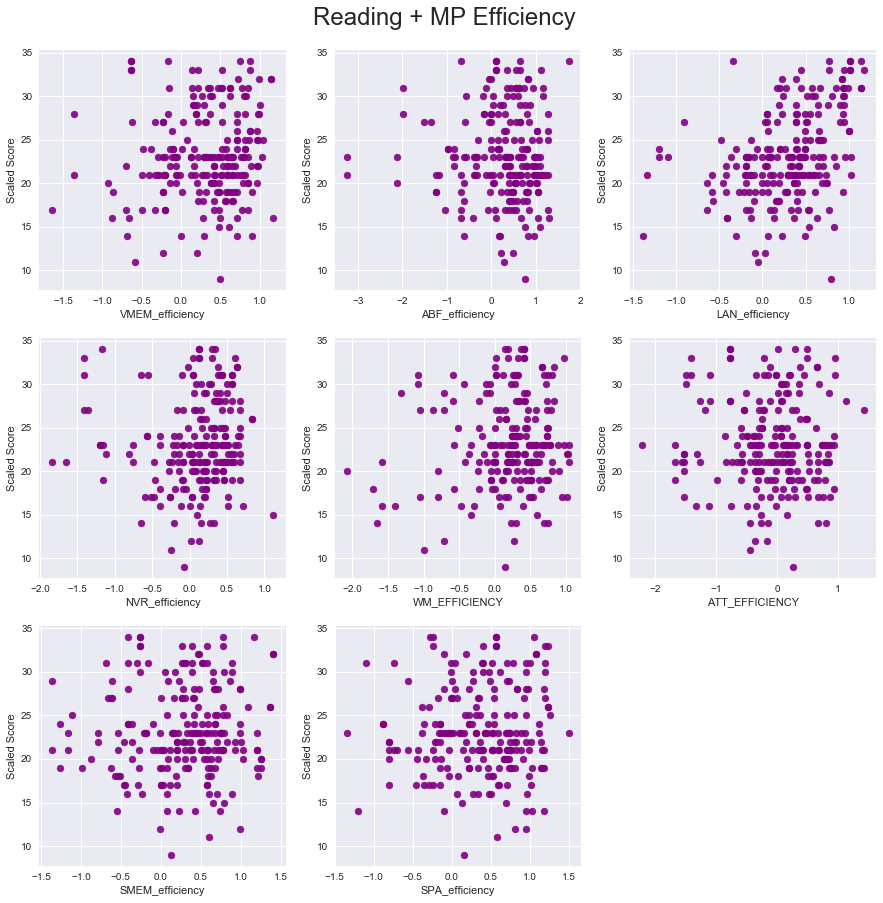

In [20]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# READING + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Reading + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'ReadingScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='purple', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='purple', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='purple', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='purple', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='purple', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='purple', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='purple', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='purple', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")

plt.show()

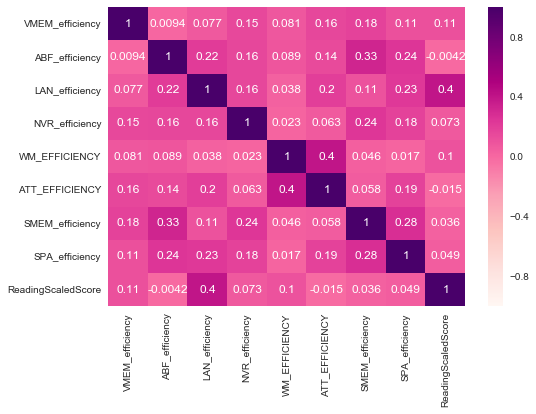

In [21]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

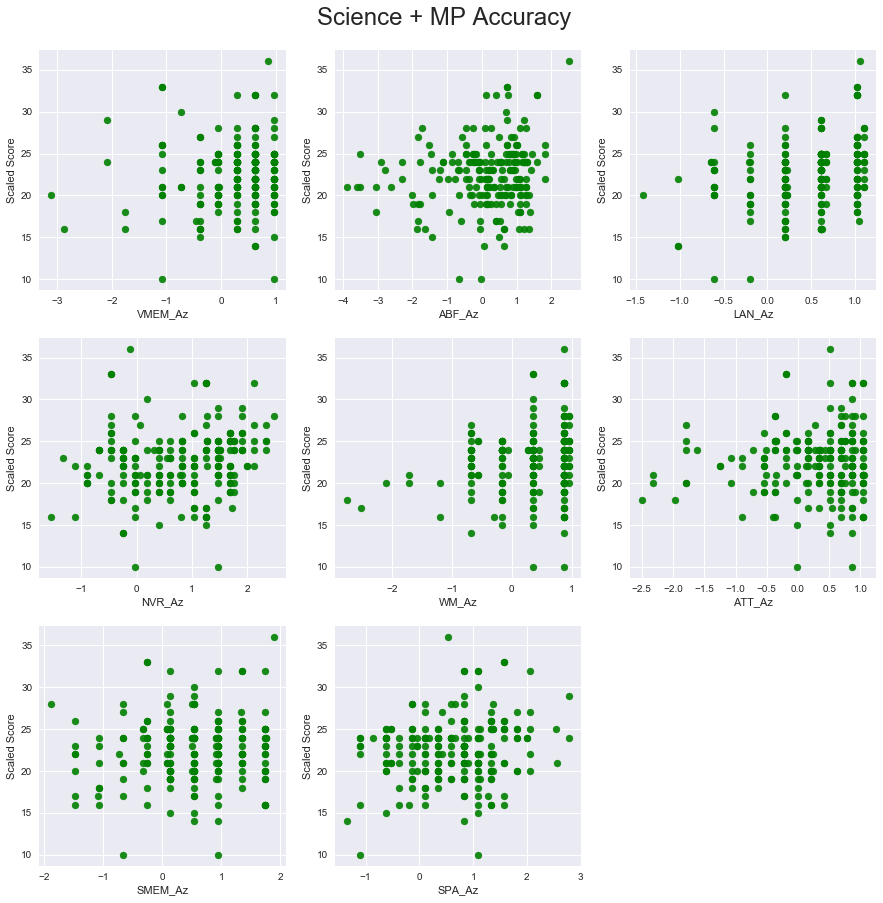

In [22]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# SCIENCE + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Science + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'ScienceScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='green', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='green', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='green', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='green', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='green', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='green', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='green', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='green', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")

plt.show()

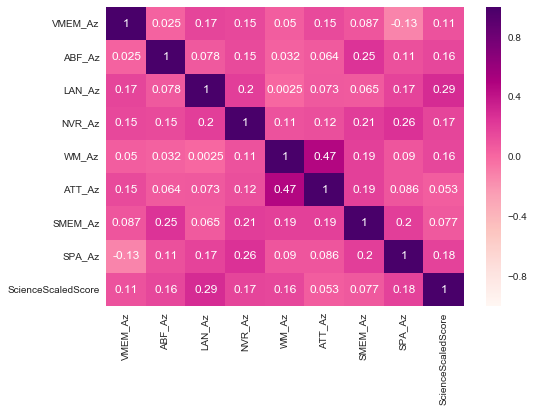

In [23]:
foo2 = mp.loc[:, mp.columns.str.contains('Az|ScienceScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

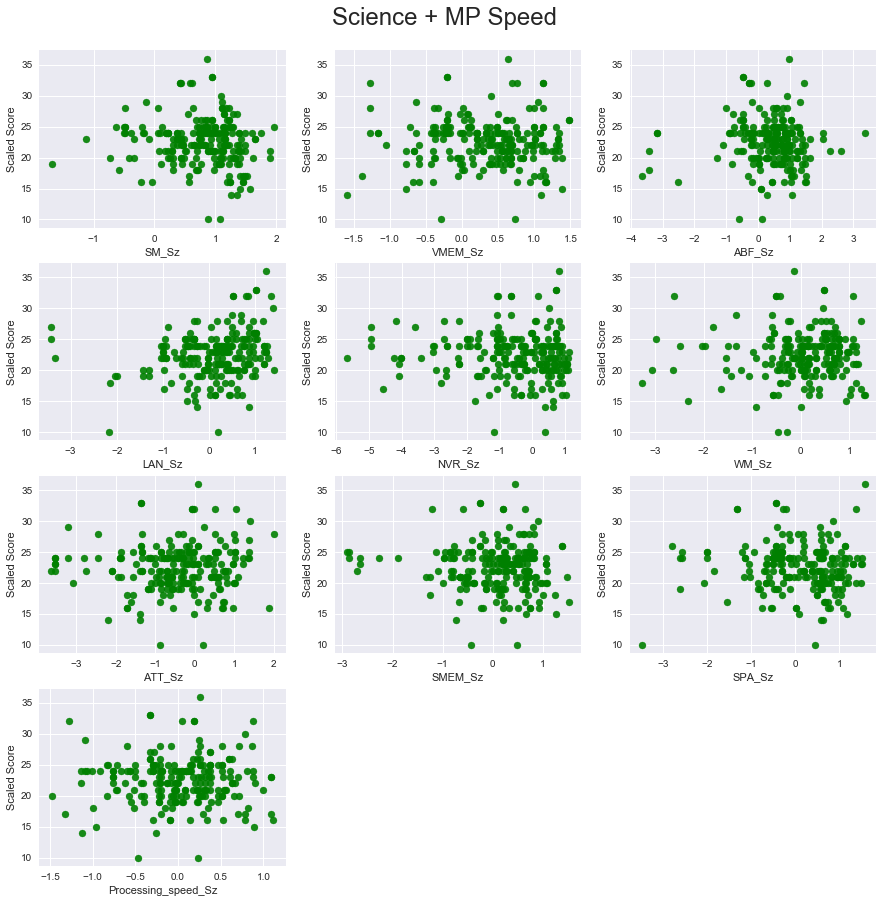

In [24]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# SCIENCE + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('Science + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'ScienceScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='green', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='green', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='green', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='green', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='green', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='green', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='green', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='green', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='green', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='green', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

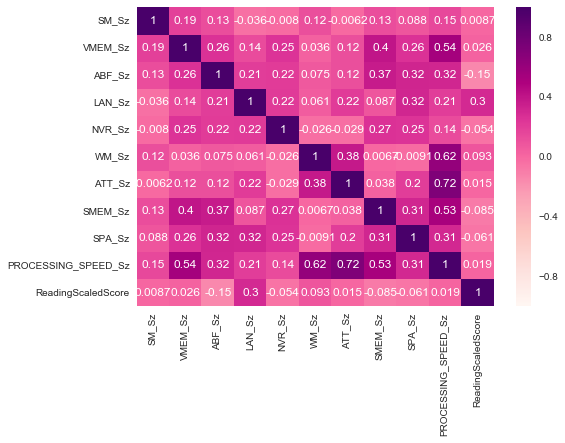

In [25]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|ReadingScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

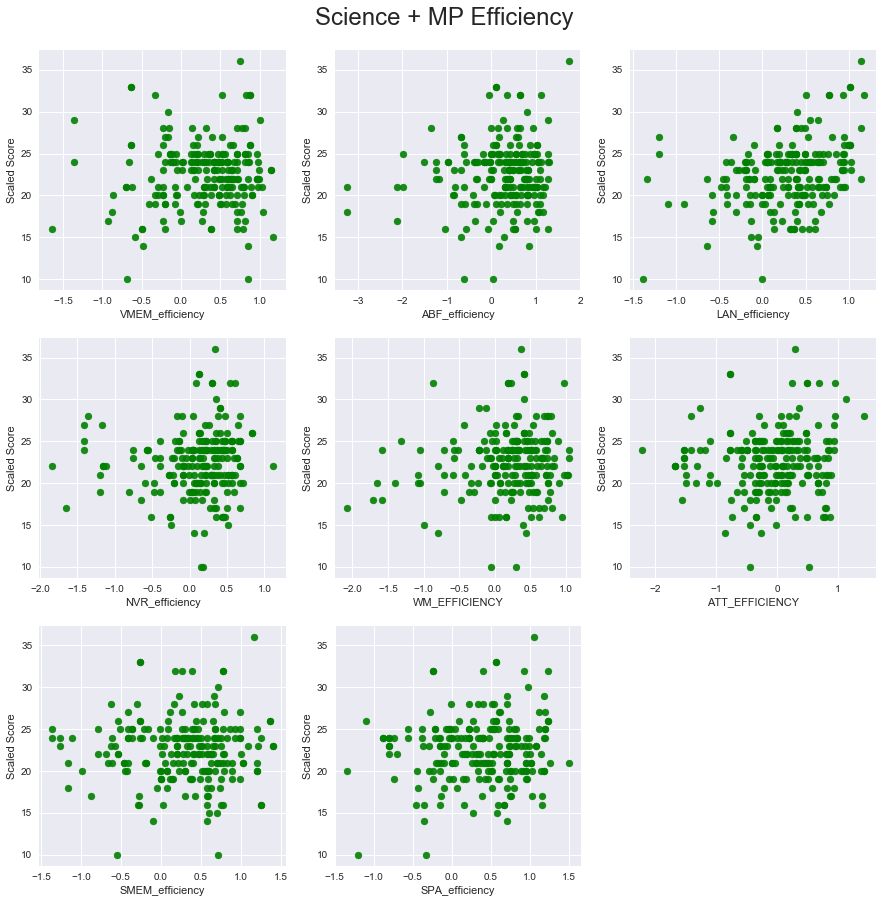

In [26]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# SCIENCE + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Science + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'ScienceScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='green', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='green', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='green', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='green', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='green', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='green', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='green', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='green', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")

plt.show()

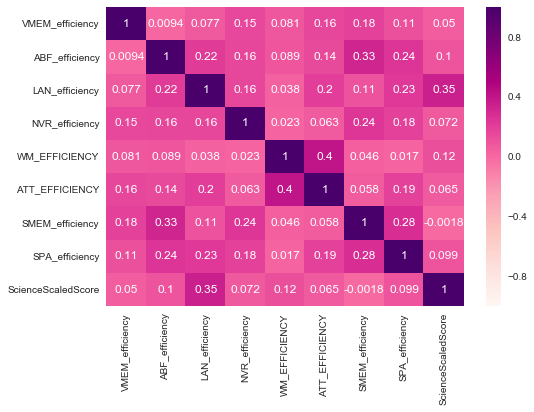

In [27]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|ScienceScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

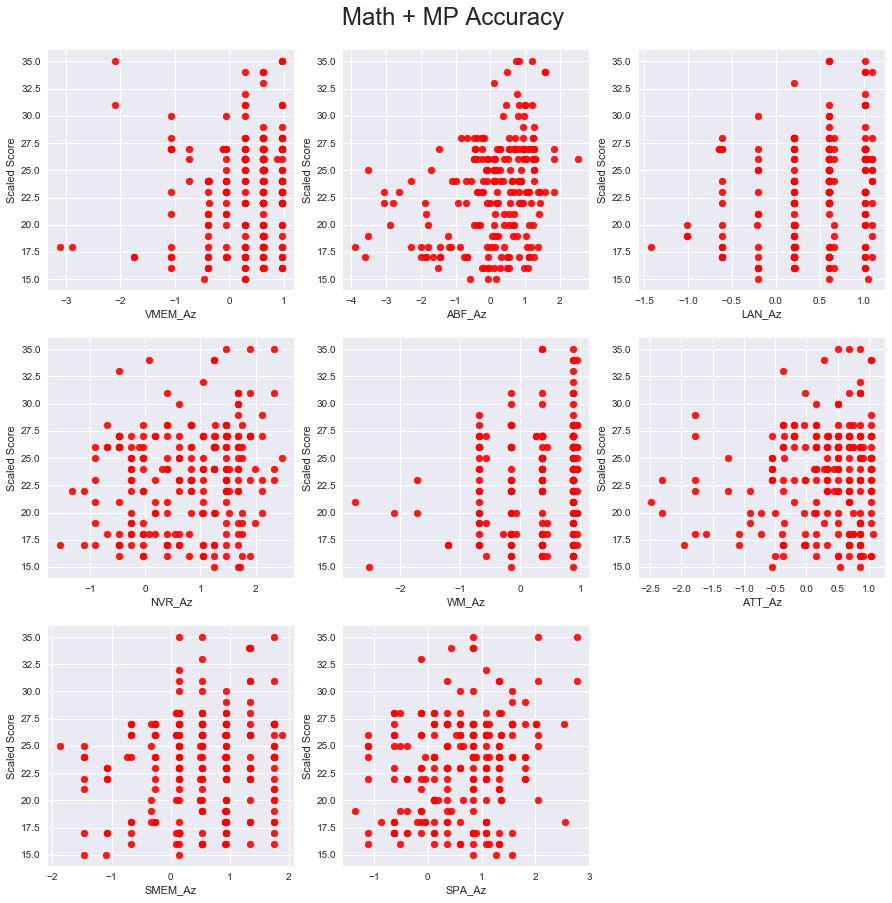

In [28]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# MATH + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Math + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'MathScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='red', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='red', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='red', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='red', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='red', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='red', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='red', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='red', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")

plt.show()

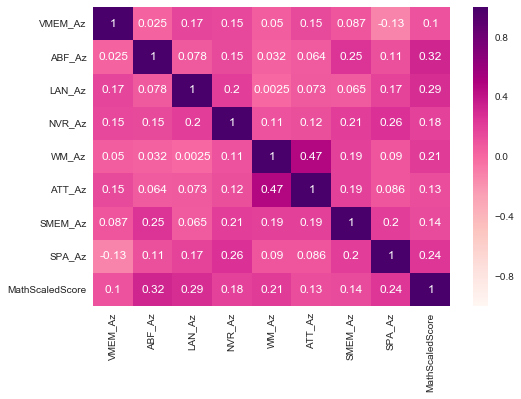

In [29]:
foo2 = mp.loc[:, mp.columns.str.contains('_Az|MathScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

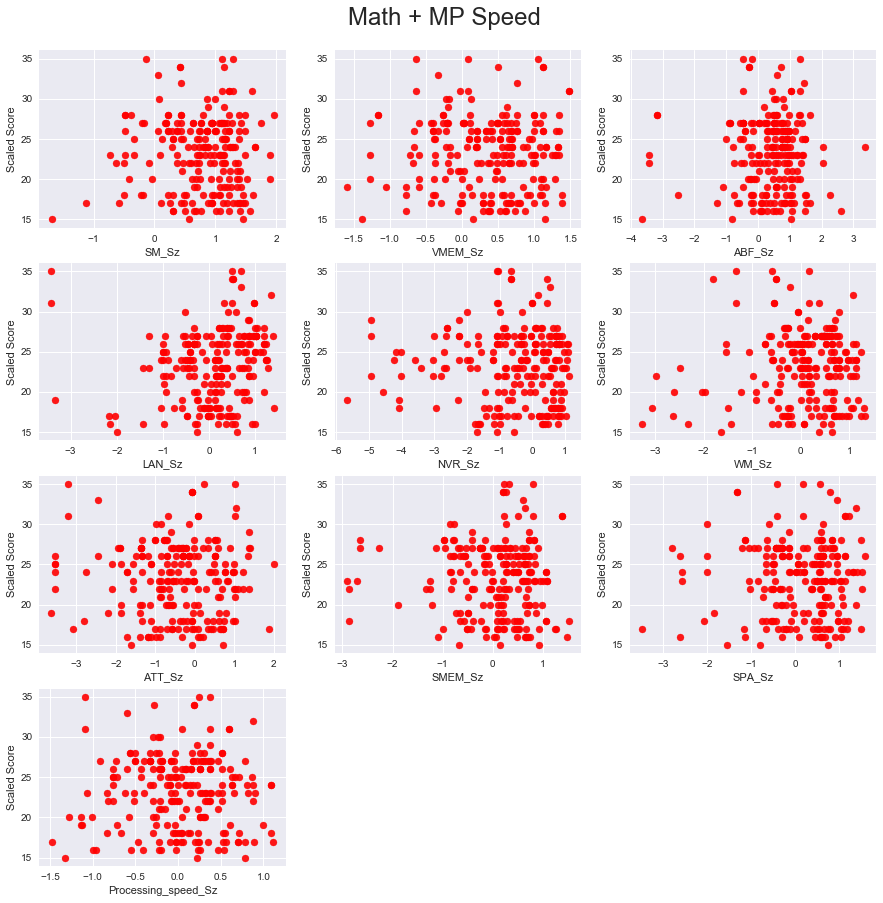

In [30]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# MATH + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('Math + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'MathScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='red', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='red', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='red', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='red', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='red', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='red', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='red', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='red', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='red', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='red', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

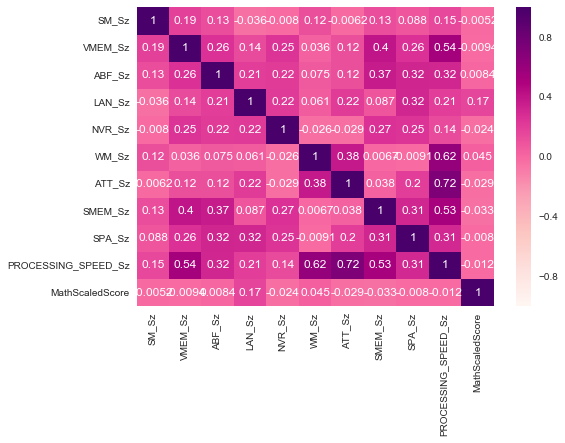

In [31]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|MathScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

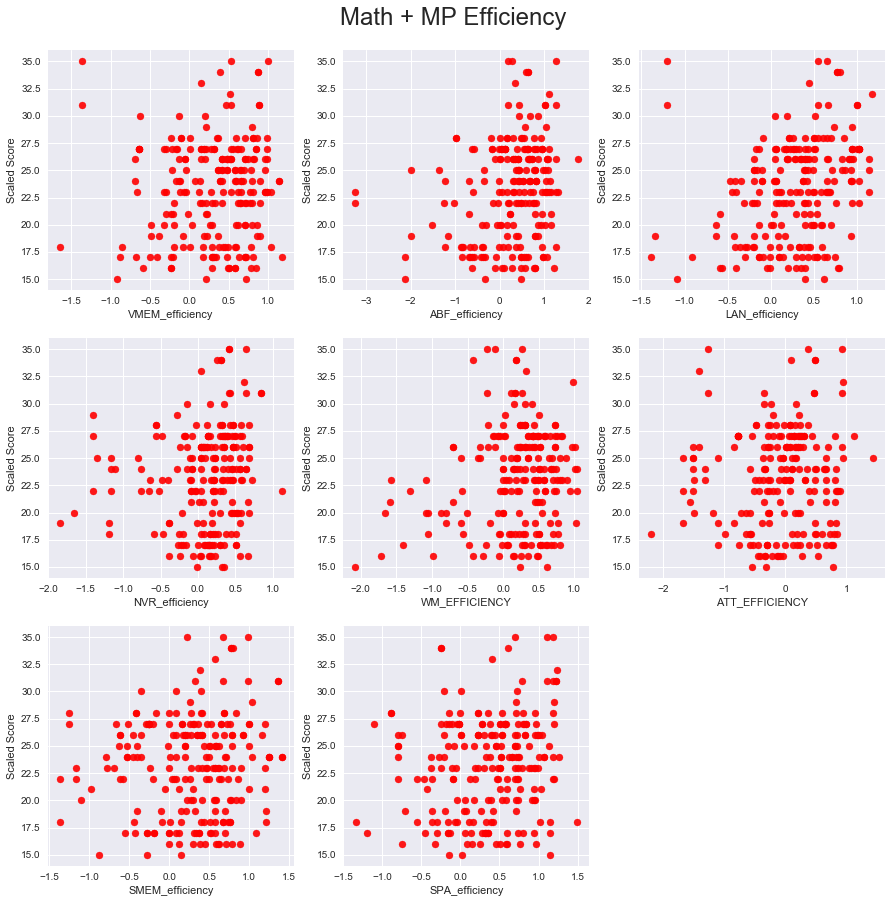

In [32]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# MATH + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('Math + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'MathScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='red', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='red', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='red', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='red', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='red', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='red', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='red', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='red', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")

plt.show()

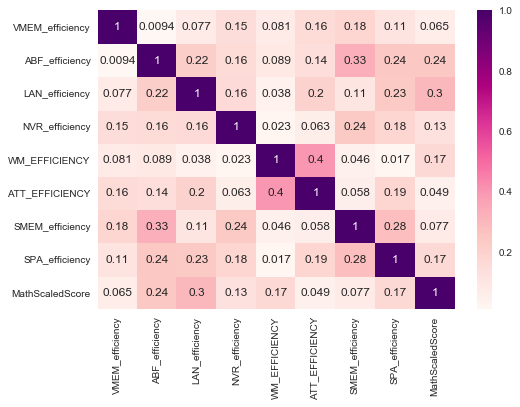

In [33]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|MathScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

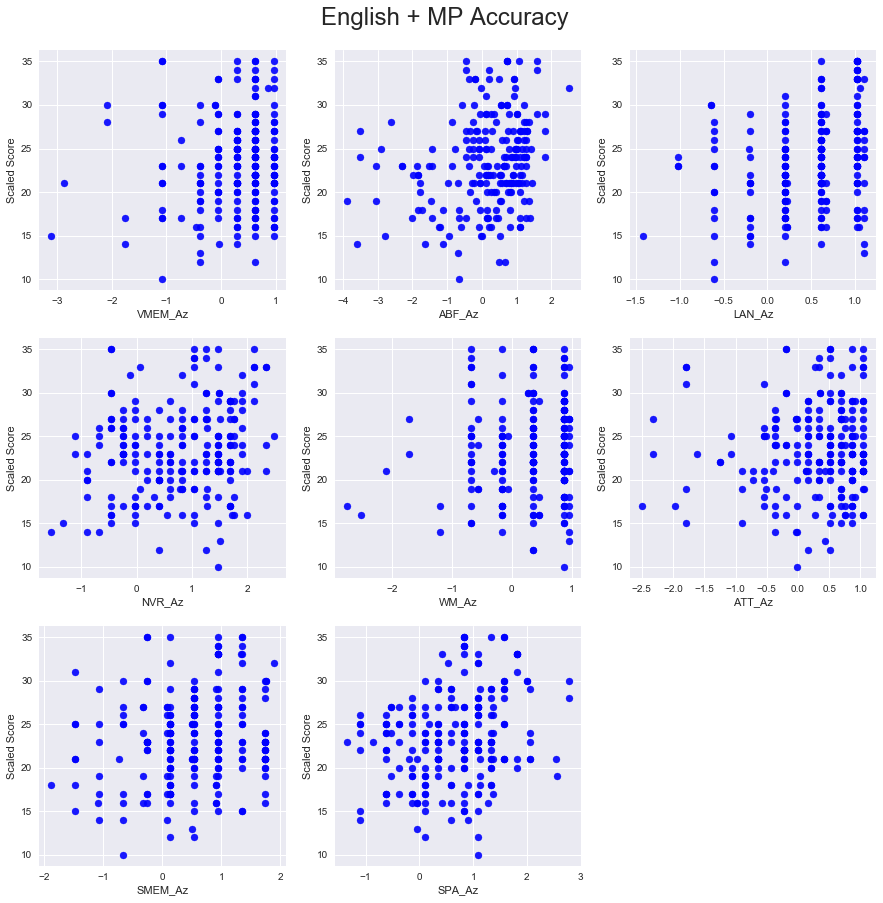

In [34]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# ENGLISH + ACCURACY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('English + MP Accuracy', fontsize=24, y=0.92)
y = mp.loc[:,'EngScaledScore']

x = mp.loc[:,'VMEM_Az']
ax1.scatter(x, y, c='blue', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_Az")

x = mp.loc[:,'ABF_Az']
ax2.scatter(x, y, c='blue', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_Az")

x = mp.loc[:,'LAN_Az']
ax3.scatter(x, y, c='blue', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_Az")

x = mp.loc[:,'NVR_Az']
ax4.scatter(x, y, c='blue', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_Az")

x = mp.loc[:,'WM_Az']
ax5.scatter(x, y, c='blue', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_Az")

x = mp.loc[:,'ATT_Az']
ax6.scatter(x, y, c='blue', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_Az")

x = mp.loc[:,'SMEM_Az']
ax7.scatter(x, y, c='blue', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_Az")

x = mp.loc[:,'SPA_Az']
ax8.scatter(x, y, c='blue', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_Az")

plt.show()

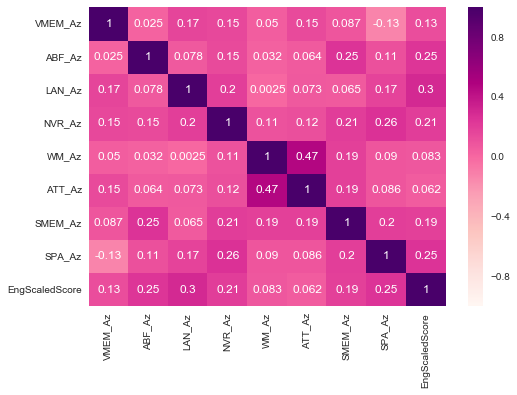

In [35]:
foo2 = mp.loc[:, mp.columns.str.contains('_Az|EngScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

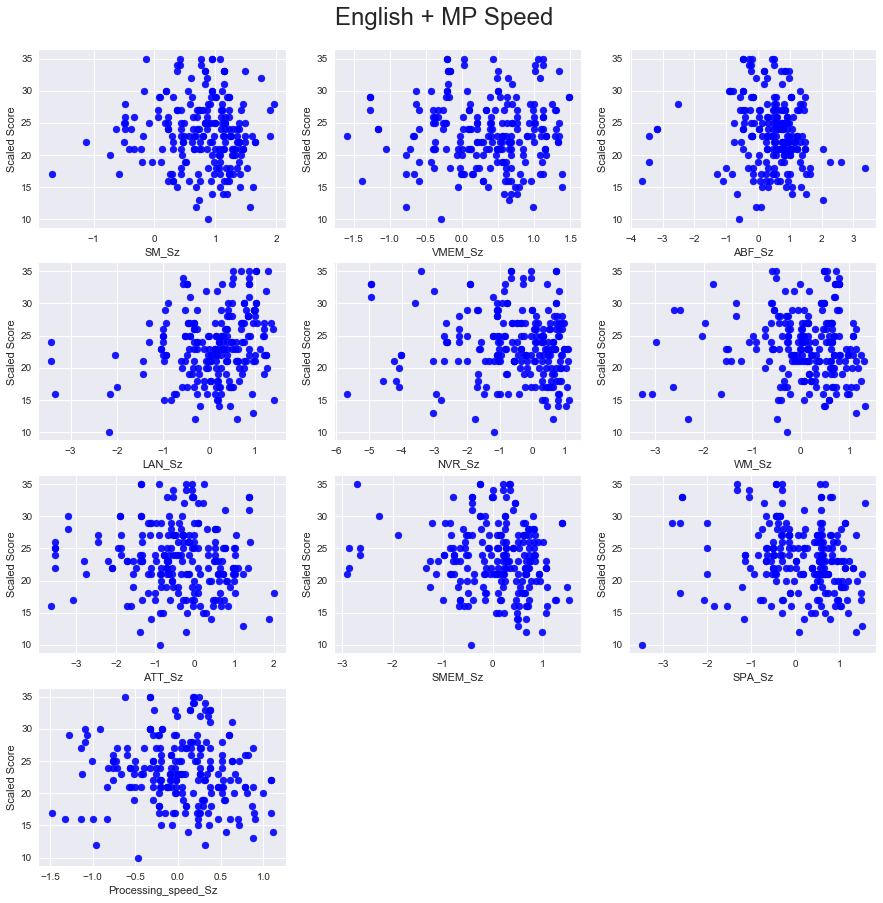

In [36]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# ENGLISH + SPEED
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(4,3,1)
ax2 = fig1.add_subplot(4,3,2)
ax3 = fig1.add_subplot(4,3,3)
ax4 = fig1.add_subplot(4,3,4)
ax5 = fig1.add_subplot(4,3,5)
ax6 = fig1.add_subplot(4,3,6)
ax7 = fig1.add_subplot(4,3,7)
ax8 = fig1.add_subplot(4,3,8)
ax9 = fig1.add_subplot(4,3,9)
ax10 = fig1.add_subplot(4,3,10)

fig1.suptitle('English + MP Speed', fontsize=24, y=0.92)
y = mp.loc[:,'EngScaledScore']

x = mp.loc[:,'SM_Sz']
ax1.scatter(x, y, c='blue', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("SM_Sz")

x = mp.loc[:,'VMEM_Sz']
ax2.scatter(x, y, c='blue', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("VMEM_Sz")

x = mp.loc[:,'ABF_Sz']
ax3.scatter(x, y, c='blue', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("ABF_Sz")

x = mp.loc[:,'LAN_Sz']
ax4.scatter(x, y, c='blue', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("LAN_Sz")

x = mp.loc[:,'NVR_Sz']
ax5.scatter(x, y, c='blue', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("NVR_Sz")

x = mp.loc[:,'WM_Sz']
ax6.scatter(x, y, c='blue', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("WM_Sz")

x = mp.loc[:,'ATT_Sz']
ax7.scatter(x, y, c='blue', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("ATT_Sz")

x = mp.loc[:,'SMEM_Sz']
ax8.scatter(x, y, c='blue', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SMEM_Sz")

x = mp.loc[:,'SPA_Sz']
ax9.scatter(x, y, c='blue', alpha=0.9)
ax9.set_ylabel("Scaled Score")
ax9.set_xlabel("SPA_Sz")

x = mp.loc[:,'PROCESSING_SPEED_Sz']
ax10.scatter(x, y, c='blue', alpha=0.9)
ax10.set_ylabel("Scaled Score")
ax10.set_xlabel("Processing_speed_Sz")

plt.show()

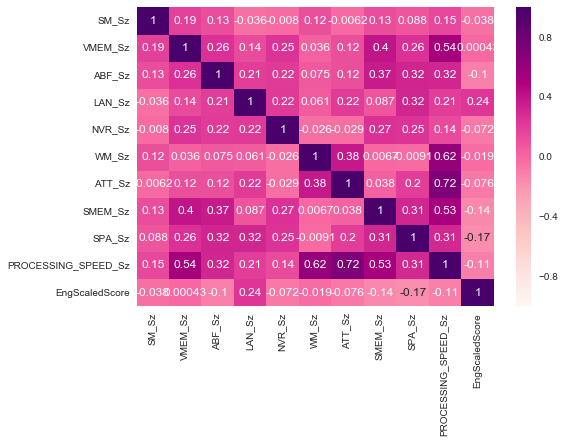

In [37]:
foo2 = mp.loc[:, mp.columns.str.contains('_Sz|EngScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score

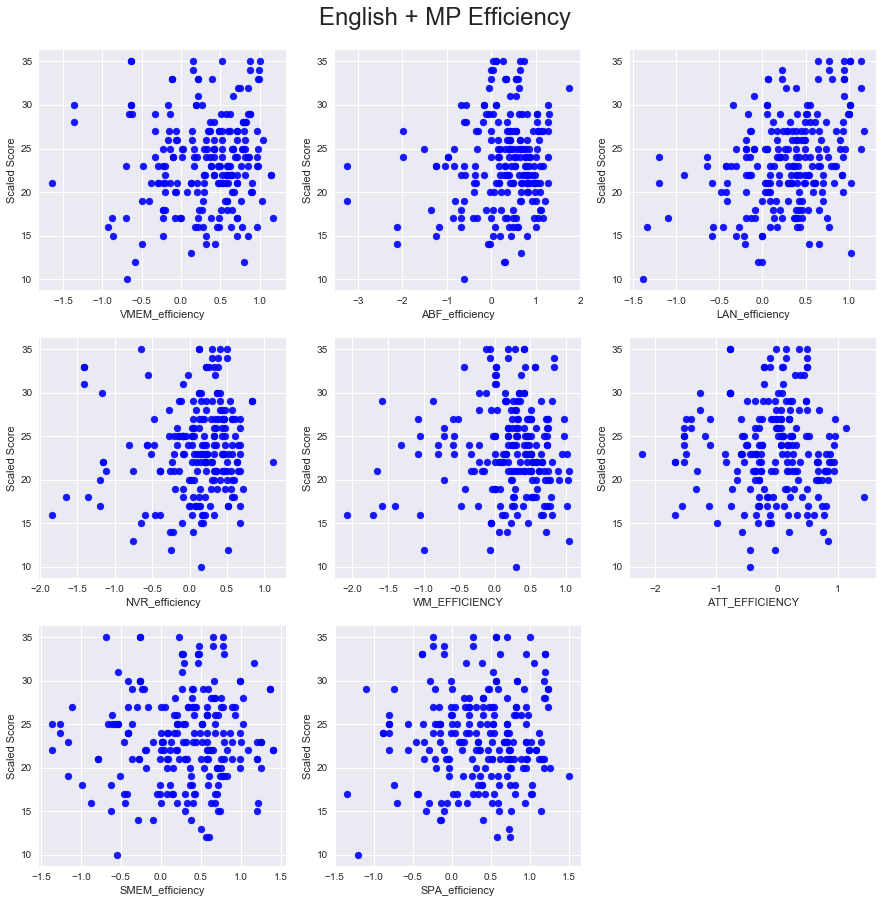

In [38]:
# Plot scatterplots for accuracy: VMEM_Az, ABF_Az, LAN_Az, NVR_Az, WM_Az, ATT_Az, SMEM_Az, SPA_Az
# speed: SM_Sz, VMEM_Sz, ABF_Sz, LAN_Sz, NVR_Sz, WM_Sz, ATT_Sz, SMEM_Sz, SPA_Sz, Processing_speed_Sz
# efficiency: VMEM_efficiency, ABF_efficiency, LAN_efficiency, NVR_efficiency, WM_EFFICIENCY, ATT_EFFICIENCY, SMEM_efficiency, SPA_efficiency

# ENGLISH + EFFICIENCY
fig1 = plt.figure(figsize=(15,15))
ax1 = fig1.add_subplot(331)
ax2 = fig1.add_subplot(332)
ax3 = fig1.add_subplot(333)
ax4 = fig1.add_subplot(334)
ax5 = fig1.add_subplot(335)
ax6 = fig1.add_subplot(336)
ax7 = fig1.add_subplot(337)
ax8 = fig1.add_subplot(338)

fig1.suptitle('English + MP Efficiency', fontsize=24, y=0.92)
y = mp.loc[:,'EngScaledScore']

x = mp.loc[:,'VMEM_efficiency']
ax1.scatter(x, y, c='blue', alpha=0.9)
ax1.set_ylabel("Scaled Score")
ax1.set_xlabel("VMEM_efficiency")

x = mp.loc[:,'ABF_efficiency']
ax2.scatter(x, y, c='blue', alpha=0.9)
ax2.set_ylabel("Scaled Score")
ax2.set_xlabel("ABF_efficiency")

x = mp.loc[:,'LAN_efficiency']
ax3.scatter(x, y, c='blue', alpha=0.9)
ax3.set_ylabel("Scaled Score")
ax3.set_xlabel("LAN_efficiency")

x = mp.loc[:,'NVR_efficiency']
ax4.scatter(x, y, c='blue', alpha=0.9)
ax4.set_ylabel("Scaled Score")
ax4.set_xlabel("NVR_efficiency")

x = mp.loc[:,'WM_EFFICIENCY']
ax5.scatter(x, y, c='blue', alpha=0.9)
ax5.set_ylabel("Scaled Score")
ax5.set_xlabel("WM_EFFICIENCY")

x = mp.loc[:,'ATT_EFFICIENCY']
ax6.scatter(x, y, c='blue', alpha=0.9)
ax6.set_ylabel("Scaled Score")
ax6.set_xlabel("ATT_EFFICIENCY")

x = mp.loc[:,'SMEM_efficiency']
ax7.scatter(x, y, c='blue', alpha=0.9)
ax7.set_ylabel("Scaled Score")
ax7.set_xlabel("SMEM_efficiency")

x = mp.loc[:,'SPA_efficiency']
ax8.scatter(x, y, c='blue', alpha=0.9)
ax8.set_ylabel("Scaled Score")
ax8.set_xlabel("SPA_efficiency")

plt.show()

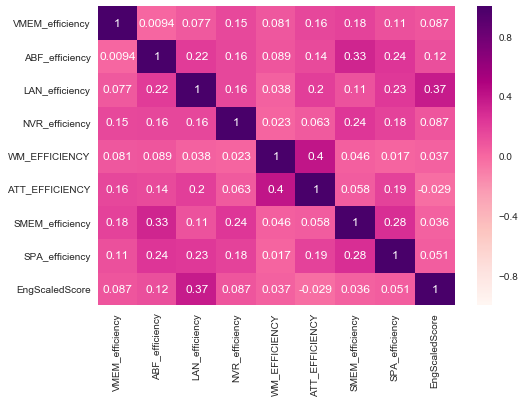

In [39]:
foo2 = mp.loc[:, mp.columns.str.contains('_EFFICIENCY|_efficiency|EngScaledScore')].copy()
fig = sns.heatmap(foo2.corr(),annot=True, cmap='RdPu')
plt2.show()

#look @ last column of correlation matrix to see which Mindprint score is strongly correlated with subject score